In [142]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def sinal(z):
    return 1 if z > 0.5 else 0

In [143]:
def calcular_erro(alpha, X, Y, A):
    erro = 0
    N = len(X)
    for n in range(N):
        p_chapeu = sigmoid(sum(alpha * (A[n]) ))
        if(1 - p_chapeu)<np.e**-12:
            erro -= np.e**-12
        else:
            erro -= (Y[n] * np.log(p_chapeu) + (1 - Y[n]) * np.log(1 - p_chapeu))
    erro = erro/N
    return erro if erro > np.e**-12 else np.e**-12

In [154]:
def CLogDKPd(X, Y, alpha, eta,epochs,d):
    t=0
    E=[]
    N=len(X)
    A=np.dot(X,X.T)
    A=A**d
    for epoca in range(epochs):
        ordem =np.random.randint(0, N)
        p_chapeu = sigmoid(sum(alpha * (A[ordem]) ))
        S = (p_chapeu-Y[ordem]) *(A[ordem])
        alpha = alpha - eta * S
        E.append(calcular_erro(alpha, X, Y, A))
        print("A ",alpha)
    return alpha, E

In [161]:
data = pd.read_csv('Ex2_D.csv', header=None)
X = np.array(data.iloc[:, :-1].values)
Y = np.array(data.iloc[:, -1].values)
eta = 0.1
epochs = 2000
alpha = np.zeros(len(X))
d=2
alpha, E = CLogDKPd(X, Y, alpha, eta, epochs, d)

A  [-0.05 -0.05 -0.2  -0.2 ]
A  [0.04453187 0.32812747 0.17812747 0.65078681]
A  [0.06765141 0.35124701 0.20124701 0.67390635]
A  [0.08916819 0.37276379 0.22276379 0.69542313]
A  [0.08918435 0.37282844 0.22282844 0.69556859]
A  [0.10927867 0.39292276 0.24292276 0.71566291]
A  [0.12811337 0.41175746 0.26175746 0.73449761]
A  [ 0.02918534  0.31282943 -0.13395465  0.3387855 ]
A  [ 0.06584499  0.34948909 -0.09729499  0.37544516]
A  [ 0.09917084  0.38281493 -0.06396915  0.408771  ]
A  [ 0.09980548  0.38535351 -0.06143057  0.41448281]
A  [ 0.00358255  0.00046177 -0.1576535   0.02959107]
A  [-0.04557104 -0.19615259 -0.2068071  -0.16702329]
A  [-0.06095132 -0.25767369 -0.22218737 -0.22854439]
A  [0.03731477 0.13539064 0.17087696 0.65585035]
A  [-0.05937073 -0.25135135  0.07419146  0.26910836]
A  [-0.04331335 -0.18712183  0.13842098  0.41362477]
A  [-0.11644121 -0.47963327  0.06529312  0.12111333]
A  [-0.04998299 -0.21380037  0.33112602  0.71923735]
A  [-0.01869264 -0.18251003  0.36241636  0.75

In [162]:
A=np.dot(X,X.T)
A=A**d
for n in range(len(X)):
    p_chapeu = sigmoid(sum(alpha * (A[n]) ))
    print(p_chapeu)
    print(sinal(p_chapeu))
    


0.7248472858408594
1
0.128945123335654
0
0.15771945735735707
0
0.9514424702451991
1


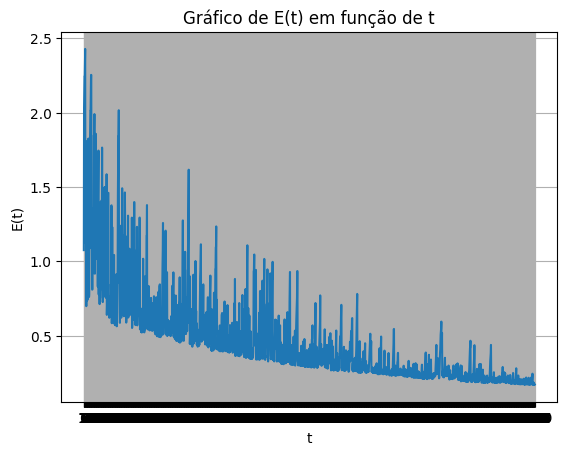

In [164]:
t = list(range(len(E)))

# Plotando o gráfico
plt.plot(t, E, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()